### 1) Delivery_time -> Predict delivery time using sorting time 
### Build a simple linear regression model by performing EDA and do 
### necessary transformations and select the best model using R or Python.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
# Importing data
df = pd.read_csv(r"delivery_time.csv")

In [4]:
df.shape

(21, 2)

In [5]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
# Checking datatypes
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [7]:
# Checking dupliacte values
df[df.duplicated()]

,Delivery Time,Sorting Time


In [8]:
# Finding Missing Values
df[df.isnull().any(axis=1)]

,Delivery Time,Sorting Time


In [9]:
df.rename(columns = {'Delivery Time':'DT'}, inplace = True)

In [10]:
df.rename(columns = {'Sorting Time':'ST'}, inplace = True)

In [11]:
df.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot: >

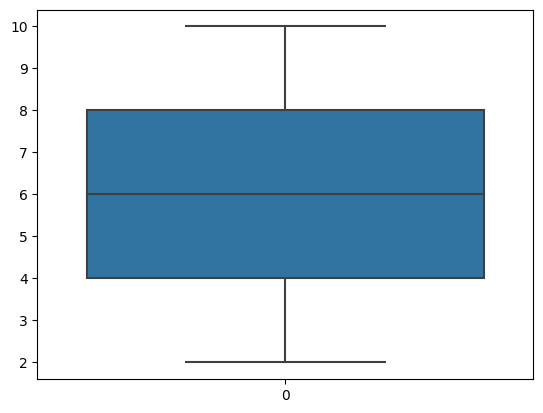

In [12]:
# Visualizing outliers using boxplot
import seaborn as sns
sns.boxplot(df['ST'])

In [13]:
# Correlation matrix for the given data.
df.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


<AxesSubplot: >

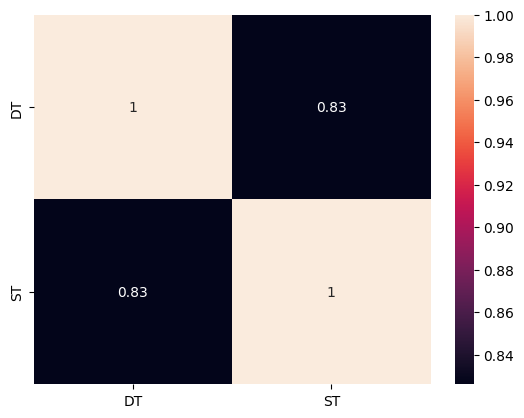

In [14]:
# Heatmaps for the given dataset.
sns.heatmap(df.corr(), annot=True)

In [15]:
# Old shape
df.shape

(21, 2)

In [16]:
# Detecting outliers using IQR and removing
Q1 = df['ST'].quantile(0.25)
Q3 = df['ST'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
upper_array =np.where(df['ST'] >= upper)[0]
lower_array = np.where(df['ST'] <= lower)[0]
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
print("New Shape: ", df.shape)

New Shape:  (21, 2)


(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

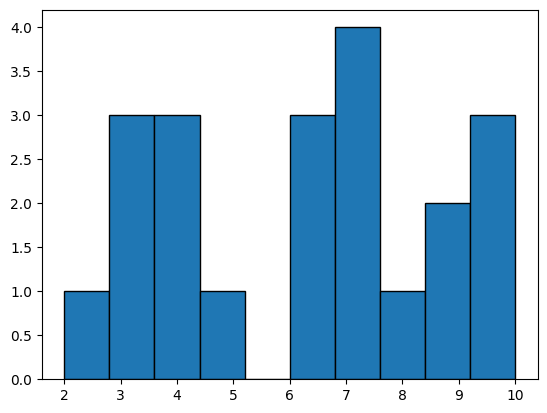

In [17]:
# Drawing Histogram to check the distribution of the data.
plt.hist(df['ST'], edgecolor='black')

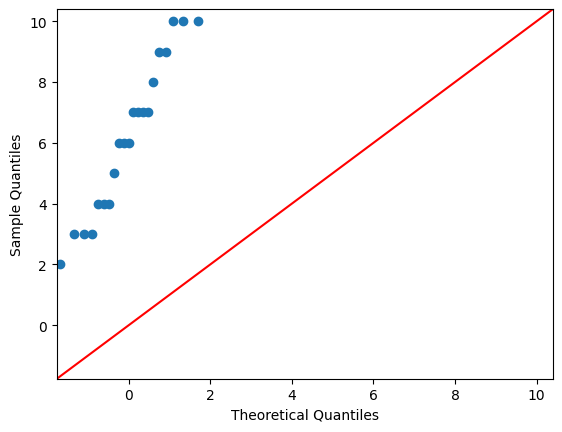

In [18]:
# Using Q-Q plot for checking the data distribution
fig = sm.qqplot(df['ST'], line='45')
plt.show()

### Both the plot shows that the data is not normally distributed 

In [19]:
# Applying cuberoot for each data to convert the dataset into normal distribution.

df1 = np.log(df)
print(df1)

          DT        ST
0   3.044522  2.302585
1   2.602690  1.386294
2   2.983153  1.791759
3   3.178054  2.197225
4   3.367296  2.302585
5   2.731115  1.791759
6   2.944439  1.945910
7   2.251292  1.098612
8   2.884801  2.302585
9   2.931194  2.197225
10  2.987196  2.079442
11  2.374906  1.386294
12  2.814210  1.945910
13  2.442347  1.098612
14  2.487404  1.098612
15  2.700018  1.386294
16  2.621039  1.791759
17  2.896464  1.945910
18  2.079442  0.693147
19  2.880882  1.945910
20  3.068053  1.609438


(array([1., 0., 3., 0., 3., 1., 3., 4., 1., 5.]),
 array([0.69314718, 0.85409097, 1.01503476, 1.17597855, 1.33692235,
        1.49786614, 1.65880993, 1.81975372, 1.98069751, 2.1416413 ,
        2.30258509]),
 <BarContainer object of 10 artists>)

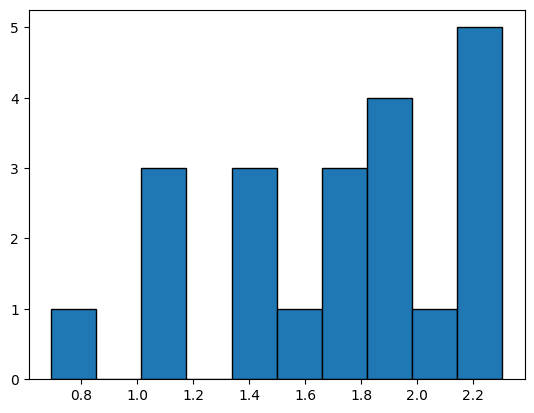

In [20]:
# Again checking the distribution and the data almost reached the normal distribution.
plt.hist(df1['ST'], edgecolor='black')

In [21]:
# Model building

import statsmodels.formula.api as smf
model = smf.ols(formula = 'DT ~ ST', data = df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           1.60e-07
Time:                        00:31:01   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
ST             0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### R-squared > 65%
### Adj. R-squared > 65%
### Adj. R-squared < R-squared
### Hence the model is good.

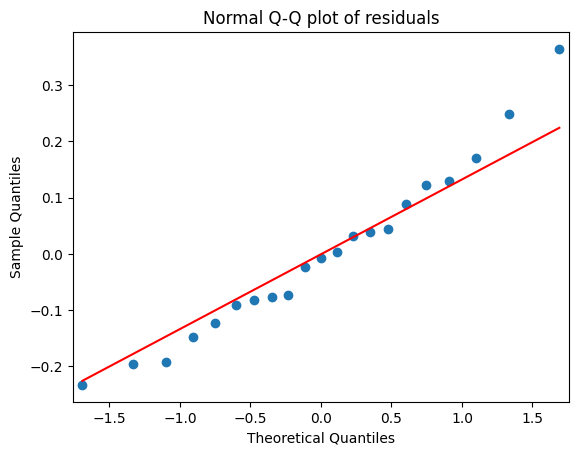

In [22]:
# Residual Analysis
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot = sm.qqplot(model.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Points are Close to the line hence the model is good

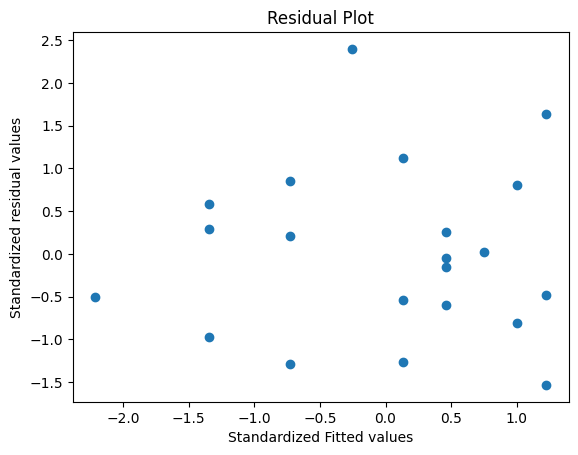

In [23]:
# Checking for Homoscedasticity
def get_std_val(vals):
    return(vals-vals.mean())/vals.std()
plt.scatter(get_std_val(model.fittedvalues),get_std_val(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Model is showing Homoscedasticity. Hence model is good.

In [26]:
# Predicting values for the new data.
new_data = pd.DataFrame({'ST':3}, index=[1])
pred = model.predict(new_data)
print(pred)

1    3.534554
dtype: float64


In [28]:
result = np.exp(pred)
print(result)

1    34.279725
dtype: float64
